# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Изучим общую информацию

Работу над проектом начнем с того, что добавим необходимые для работы библиотеки, откроем датафрейм, выведем общую информацию по нему, а также построим гистограммы для каждого столбца датафрейма.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


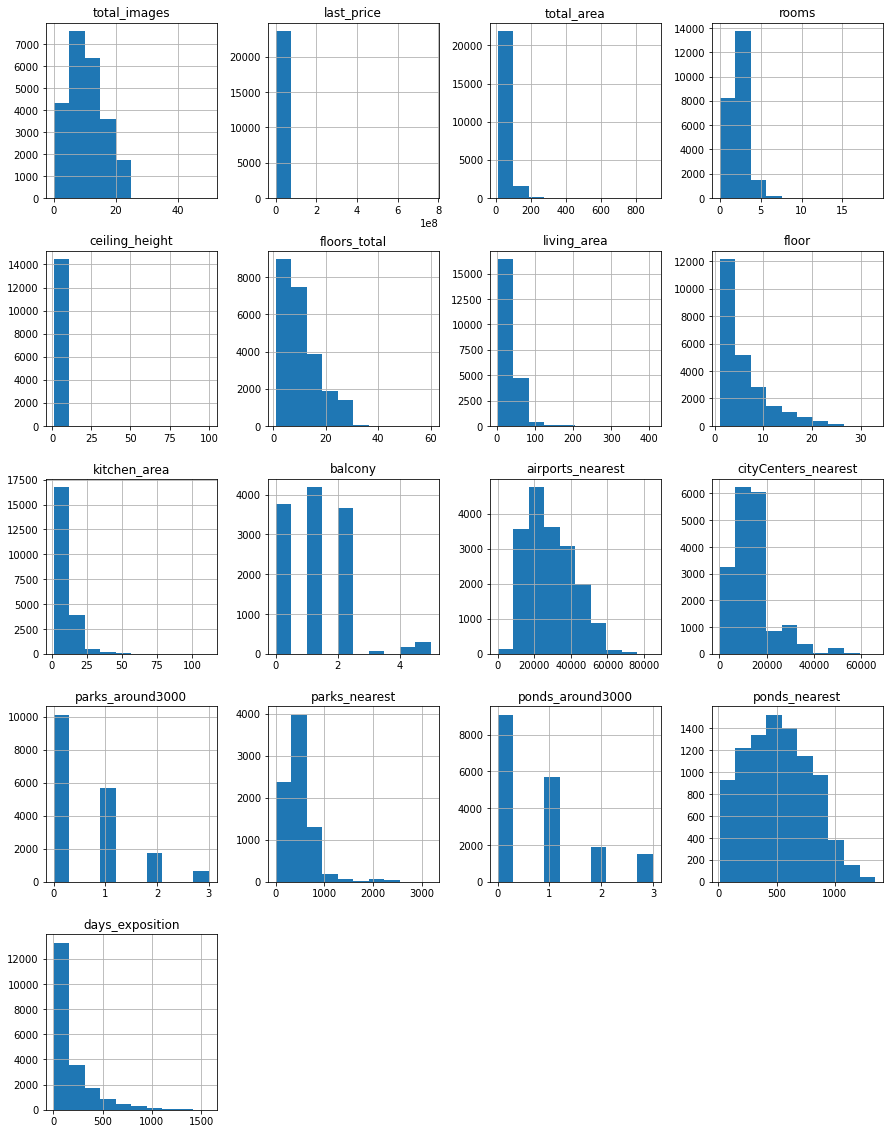

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
display(data.head(15))
pd.set_option('display.max_columns', None)
data.hist(figsize=(15, 20))
plt.show()
data.info()

<b>Вывод: </b> датасет содержит 23699 строк и 22 столбца, в некоторых столбцах имеется весьма много пропущенных значений - попробуем исправить это на следующих этапах работы.

### Предобработка данных

Определим количество пропущенных значений в каждом столбце датафрейма

In [3]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Заполним пропуски в столбце 'balcony'. Поскольку данные о количестве балконов добавляет пользователь, будем исходить из логики, что пропущенные значения означают отсутствия балкона в квартире. Поэтому заполним пропущенные значения нулями.

In [4]:
data['balcony'] = data['balcony'].fillna(0)

Также поменяем тип данных в этом столбце, т.к. количество балконов всегда целое число:

In [5]:
data['balcony'].astype('int')

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: int64

Заполним пропуски в столбце 'ceiling_height' средним значением высоты потолка. При нахождении среднего будем учитывать, что потолки квартир редко бывают больше 5-6 метров, поэтому для более точного нахождения величины средней высоты ограничимся стандартными квартирами.

In [6]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.query('0 < ceiling_height < 6')['ceiling_height'].mean())

Пропущенные значения из столбца 'floors_total' мы не можем заполнить по текущим данным (поскольку у нас нет даже адресов домов). Поэтому пока оставим их без изменений. Пропуски могли возникнуть из-за невнимательного заполнения данных пользователем или из-за технических ошибок (ошибки при загрузке/выгрузке данных и др.)

Заполним пропуски в столбце 'living_area' медианным значением площади в зависимости от количества комнат. Для этого сгруппируем квартиры по количеству комнат и найдем медианное значение площади для каждого количества комнат и заполним этими значениями пропуски.\
Также уберем квартиры с площадью жилых помещений меньше 8 квадратных метров, т.к. они не соответствуют нормативам по минимальной площади жилых помещений в квартире.

In [7]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()
data = data.loc[data['living_area'] > 8]

Заполним пропуски в столбце 'is_apartment'. Будем исходить из логики, что владельцы апартаментов обычно в курсе о типе своей недвижимости, т.к. этот тип появился сравнительно недавно и этот тип недвижимости имеет некоторые юридичесские ограничения (например, связанные с пропиской). Поэтому будем считать, что все пропущенные значения это не апартаменты.

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Также поменяем тип данных в данном столбце на логический, т.к. это подразумевается первоначально заполненными значениями.

In [9]:
data['is_apartment'].astype('bool')

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23689, dtype: bool

Проверим, есть ли у нас строки в которых площадь кухни превышает общую площадь квартиры (т.к. это явно противоречит здравому смыслу):

In [10]:
print(len(data.loc[data['kitchen_area'] > data['total_area']]))

0


Как мы видим таких строк у нас в датафрейме нет. <font color='black'> Заполним пропуски в столбце 'kitchen_area' средним значением площади кухни, т.к. во многих квартирах площадь кухонь стандартна.

In [11]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].mean())

Посмотрим распределение квартир по населенным пунктам.

In [12]:
print(data['locality_name'].value_counts())

Санкт-Петербург                    15712
посёлок Мурино                       521
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
посёлок Платформа 69-й километр        1
поселок Тёсово-4                       1
посёлок Петро-Славянка                 1
деревня Тойворово                      1
посёлок Сумино                         1
Name: locality_name, Length: 364, dtype: int64


Пропуски в столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' мы могли бы заполнить медианными значениями расстояний в зависимости от населенного пункта, но поскольку большая часть объектов находится непосредственно в Санкт-Петербурге, а конкретного адреса мы не имеем для каждой квартиры, то оставим эти пропуски без изменений.\
Чтобы убедиться, что расстояния до разных объектов даже в пределах Санкт-Петербурга сильно разнятся, выведем информацию с расстояниями до объектов, а также количеством водоемов и парков для некоторых квартир непосредственно из Санкт-Петербурга:

In [13]:
display(data.loc[data['locality_name'] == 'Санкт-Петербург', ('locality_name','airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest')].head(15))

,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0
2,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0
7,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN
9,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN
10,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0
15,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0
16,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN
17,Санкт-Петербург,33564.0,14616.0,0.0,NaN,1.0,859.0


Как мы видим данные по каждому из столбцов довольно сильно разнятся, поэтому мы не можем использовать средние или медианные значения даже в пределах одного города.\
Пропуски в данных о расстояних до различных объектов и количестве близлежащих водоемов и парков могли возникнуть как по техническим причинам(из-за потери части данных(например, автоматизированная система сбора информации дала сбой) или на этапе загрузки/выгрузки данных была потеряна часть информации), а также пропуски могли возникнуть по причине человеческого фактора - из-за невнимательного заполнения данных пользователем.

Пропуски в столбце 'locality_name' мы не можем заполнить без дополнительной информации. Поэтому пока оставим их без изменений. Пропуски могли возникнуть из-за невнимательного заполнения данных пользователем или из-за технических ошибок(ошибки при загрузке/выгрузке данных и др.)

Пропуски в столбце 'days_exposition' мы также не можем заполнить без дополнительной информации (в том числе из-за того, что некоторые объявления еще могли не снять). Поэтому пока оставим их без изменений. Пропуски могли возникнуть из-за невнимательного заполнения данных пользователем или из-за технических ошибок(ошибки при загрузке/выгрузке данных и др.)

Посмотрим как изменилось число пропусков в нашем датафрейме:

In [14]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5541
cityCenters_nearest      5518
parks_around3000         5517
parks_nearest           15617
ponds_around3000         5517
ponds_nearest           14584
days_exposition          3180
dtype: int64


Как мы видим осталось много пропусков связанных с расстоянием до аэропорта, парка, центра города, водоема и их количества - попробуем разобраться с ними позже.

Изучим столбец с названиями населенных пунктов. Для этого выведем все уникальные значения и их количество столбца 'locality_name':

In [15]:
print(data['locality_name'].unique())
print(data['locality_name'].nunique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Как видим здесь встречаются неявные дубликаты (например, 'поселок городского типа Рябово' и 'поселок Рябово').\
Исправим это.

In [16]:
data['locality_name'] = data['locality_name'].replace(['посёлок ','поселок городского типа ','посёлок городского типа ', 'поселок ','садовое товарищество ', 'городской посёлок ', 'городской поселок ', 'деревня ', 'село ', 'городской ', ' городского типа ', 'городского типа ', 'коттеджный ', 'при железнодорожной станции ', ' станции ', 'станции ', 'садоводческое некоммерческое товарищество ', 'имени '], '', regex=True)
print(data['locality_name'].unique())

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодёжное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалёво' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Вартемяги' 'Тельмана' '

In [17]:
print(data['locality_name'].nunique())

305


Как мы видим, удалив тип населенного пункта перед его непосредственным назвванием, мы смогли сократить количество неявных дубликатов в названиях с 364 до 305.

Рассмотрим редкие и выбивающиеся значения по всем столбцам таблицы.

Рассмотрим столбец 'ceiling_height' и обратим внимание на высоту потолка выше 6м (обычно это максимальная высота потолков в элитных квартирах) и меньше 2,4м (согласно нормативам это минимальная высота потолков для квартир).

In [18]:
print(data.query('ceiling_height > 6')['ceiling_height'])
print(data.query('ceiling_height < 2.4')['ceiling_height'])

355       25.0
3148      32.0
3474       8.0
4643      25.0
4876      27.0
5076      24.0
5246      27.0
5669      26.0
5807      27.0
5863       8.3
6246      25.0
9379      25.0
10773     27.0
11285     25.0
14382     25.0
15061     14.0
15743      8.0
17442      8.0
17496     20.0
17857     27.0
18545     25.0
20478     27.0
20507     22.6
21377     27.5
21824     27.0
22309     10.3
22336     32.0
22869    100.0
22938     27.0
Name: ceiling_height, dtype: float64
227      2.34
552      2.00
1582     2.30
2572     2.00
4212     2.00
5498     2.30
5712     1.20
5850     2.00
11352    2.00
12755    2.20
16446    2.00
16884    2.00
16934    1.75
17762    2.30
17794    2.25
19098    2.00
19329    2.00
20520    2.00
22590    1.00
22960    2.00
23498    2.30
Name: ceiling_height, dtype: float64


Можем предположить, что указанные высоты в 20-30 метров являются на самом деле 2.0-3.0 метрами для которых забыли добавить запятую между разрядами. Исправим это:

In [19]:
data.loc[data['ceiling_height'] > 6, 'ceiling_height'] = data['ceiling_height']/10
print(data.query('ceiling_height > 6')['ceiling_height'])

22869    10.0
Name: ceiling_height, dtype: float64


Как вы видим осталась только одна квартира с непонятной высотой - избавимся от нее. А также избавимся от квартир и удалим строки, в которых высота потолка меньше 2,4м

In [20]:
data = data.loc[data['ceiling_height'] < 6]
data = data.loc[data['ceiling_height'] > 2.4]

Рассмотрим общие площади квартир в столбце 'total_area' и посмотрим на возможные аномалии в этом столбце:

In [21]:
print(data['total_area'].sort_values())

19904     12.0
19546     13.0
19807     13.0
17961     13.0
19558     13.2
         ...  
5358     590.0
15651    618.0
3117     631.0
12859    631.2
19540    900.0
Name: total_area, Length: 23634, dtype: float64


Как мы видим данные по площадям находятся в диапазоне от 12 до 900 кв.метра. Если ориентироваться на данные из открытых источников, то эти данные соотвествуют действительности и квартиры с такими площадями существуют так как:
- если посмотреть на максимальные площади, то данные о квартирах больше 400 кв.метров могут смутить, однако по информации из открытых источников мы можем узнать, что такие объекты реально существуют - в частности квартира площадью 900 кв.метров реально существует в Санкт-Петербурге, поэтому будем считать, что и квартиры с меньшими площадями существуют.
- если посмотреть на минимальные площади, то по данным из открытых источников мы также можем судить, что квартиры площадью 12 кв.метров (и даже меньше) также существуют - в частности, квартира площадью 10 кв.метров реально существует в Санкт-Петербурге, поэтому будем считать, что и квартиры с большими площадями существуют. 

Поэтому оставим значения в этом столбце без изменений. 

Рассмотрим данные по количеству комнат в столбце 'rooms' и посмотрим на возможные аномалии в этом столбце:

In [22]:
print(data['rooms'].value_counts())

1     8024
2     7916
3     5801
4     1177
5      326
0      195
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64


Как мы видим у нас имеется 197 квартир с 0 комнат, чего быть не может - скорее всего в этих квартирах 1 комната. Исправим это.

In [23]:
data.loc[data['rooms'] == 0, 'rooms'] = 1

Посмотрим как изменились значения в столбце 'rooms':

In [24]:
print(data['rooms'].value_counts())

1     8219
2     7916
3     5801
4     1177
5      326
6      105
7       59
8       12
9        8
10       3
11       2
14       2
16       1
19       1
12       1
15       1
Name: rooms, dtype: int64


Теперь все квартиры с нулем комнат стали однокомнатными.\
Как мы видим максимальное количество комнат в одной из квартир - 19. Если судить по данным из открытых источников, то максимальное количество комнат в продаваемых в России квартирах - 20, поэтому будем считать, что наша квартира с 19 комнатами и все остальные квартиры  с меньшим количеством комнат существуют.

Рассмотрим данные об этажах, на которых находятся квартиры, и об общем количестве этажей в домах:

In [25]:
print(data['floor'].value_counts())
print(data['floors_total'].value_counts())

2     3357
3     3069
1     2903
4     2800
5     2611
6     1302
7     1216
8     1078
9     1049
10     687
12     525
11     520
13     379
15     342
14     335
16     315
17     226
18     178
19     147
21     124
22     112
20     110
23     100
24      63
25      46
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64
5.0     5760
9.0     3755
16.0    1373
12.0    1358
4.0     1199
10.0    1174
25.0    1074
6.0      911
17.0     830
3.0      668
7.0      590
14.0     550
18.0     504
24.0     468
8.0      388
2.0      380
15.0     364
23.0     352
19.0     339
22.0     285
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
35.0      24
1.0       24
28.0      21
36.0       3
29.0       1
60.0       1
52.0       1
34.0       1
33.0       1
Name: floors_total, dtype: int64


По данным из открытых источников максимальная этажность зданий в Санкт-Петербурге составляет 87 этажей.  Как мы видим, количество этажей в нашем случае не превышает эту цифру, следовательно оставим эти столбцы без изменений. 

Рассмотрим данные по количеству балконов в столбце 'balcony':

In [26]:
print(data['balcony'].value_counts())

0.0    15242
1.0     4178
2.0     3651
5.0      300
4.0      183
3.0       80
Name: balcony, dtype: int64


Как мы видим у нас нет неправдоподобных значений, поэтому оставляем этот столбец без изменений.

Рассмотрим данные о стоимости продаваемых квартир и выведем на экран данные и самых дорогих и дешевых квартирах:

In [27]:
print(data.sort_values(by='last_price')['last_price'])

8793         12190.0
14911       430000.0
17456       430000.0
16274       440000.0
5698        450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23634, dtype: float64


Как мы видим самая дорогая квартира стоит 763 млн. Если судить по данным из открытых источников, то самая дорогая квартира в Санкт-Петербурге стоит 1 млрд., поэтому будем считать, что наша квартира за 763 млн. и дешевле также существуют.\
Самая дешевая квартира стоит 12 тыс. и это выглядит уже странно, т.к. по данным из открытых источников самая дешевая квартира в России стоит 200 тыс, поэтому такую квартиру мы будем считать аномалией и удалим из нашего датафрейма. Следующая за ней квартира стоит 430 тыс. и с учетом выше сказанного о минимальной стомости квартир будем считать, что квартиры с такой ценой и выше существуют, поэтому избавимся только от квартиры за 12 тыс.

In [28]:
data = data.loc[data['last_price'] > 200000]

Поскольку на данном этапе мы не можем оценить правдоподобность расстояний до различных объектов и площади различных объектов внутри квартиры, то оставим соответствующие столбцы без изменений.

Обновим индексы поскольку некоторые строки таблицы были удалены:

In [29]:
data = data.reset_index(drop = True)

Проверим какой процент данных остался в нашем датафрейме после удаления всех аномалий. При работе с датафреймом мы можем удалить не более 10% от изначального объёма данных. Первоначально в нашем датафрейме было 23699 значений (данные из 1 раздела). Посмотрим сколько их осталось сейчас и какой процент от первоначального объема они составляют:

In [30]:
print(data.shape[0])
print(data.shape[0]/23699*100)

23633
99.72150723659226


Как мы видим мы удалили меньше 1% от первоначальных данных, следовательно можем дальше продолжать работу с датафреймом.

<b>Вывод: </b> в большинсте столбцов были проведены замены пропущенных значений, а в некоторых были указаны причины по которым замены трудно осуществить, а также высказаны причины по которым могли возникнуть пропуски. Также были убраны аномальные значения и поменяны типы данных для некоторых столбцов, а также убраны дубликаты в названиях населенных пунктов.

### Посчитаем и добавим в таблицу новые столбцы

Добавим в таблицу новый столбец с ценой одного квадратного метра и выведем первые и последние несколько строк получившегося столбца на экран.

In [31]:
data['price_area'] = data['last_price']/data['total_area']
print(data['price_area'])

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23628     72490.845228
23629     52542.372881
23630     44091.710758
23631    149511.400651
23632     41795.665635
Name: price_area, Length: 23633, dtype: float64


Добавим столбец с днем недели публикации объявления и выведем несколько его строк на экран. Но перед этим поменяем формат времени в исходной таблице и избавимся от часов, минут и секунд (т.к. они для всех строк имеют дефолтное значение и ничего нам не показывают)

In [32]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y.%m.%d')

In [33]:
data['day_of_week_exposition'] = data['first_day_exposition'].dt.weekday
print(data['day_of_week_exposition'])

0        3
1        1
2        3
3        4
4        1
        ..
23628    1
23629    0
23630    6
23631    1
23632    4
Name: day_of_week_exposition, Length: 23633, dtype: int64


В полученном столбце понедельнику соответствует 0, вторнику - 1, среде - 2 и т.д.

Добавим столбец с месяцем публикации объявления и выведем несколько его строк на экран.

In [34]:
data['month_exposition'] = data['first_day_exposition'].dt.month
print(data['month_exposition'])

0         3
1        12
2         8
3         7
4         6
         ..
23628     3
23629     1
23630     2
23631     3
23632     7
Name: month_exposition, Length: 23633, dtype: int64


Добавим столбец с годом публикации объявления и выведем несколько его строк на экран.

In [35]:
data['year_exposition'] = data['first_day_exposition'].dt.year
print(data['year_exposition'])

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23628    2017
23629    2018
23630    2018
23631    2017
23632    2017
Name: year_exposition, Length: 23633, dtype: int64


Добавим столбец с типом этажа квартиры (значения — «первый», «последний», «другой») и выведем несколько его строк на экран.

In [36]:
data.loc[data['floor'] == 1, 'type_floor'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'type_floor'] = 'последний'
data.loc[(data['floor'] != data['floors_total']) & (data['floor'] != 1), 'type_floor'] = 'другой'
print(data['type_floor'].head(15))

0        другой
1        первый
2        другой
3        другой
4        другой
5        другой
6        другой
7        другой
8        другой
9        другой
10       другой
11       другой
12    последний
13    последний
14       первый
Name: type_floor, dtype: object


Добавим столбец с расстоянием до центра города в километрах, округлим полученные значения и выведем несколько его строк на экран.

In [37]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round()
print(data['cityCenters_nearest_km'])

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23628     4.0
23629     NaN
23630     NaN
23631    10.0
23632     NaN
Name: cityCenters_nearest_km, Length: 23633, dtype: float64


<b>Вывод: </b> в таблицу были добавлены новые столбцы, для каждого столбца были проведены необходимые расчеты и изменен формат времени.

### Проведем исследовательский анализ данных

Изучим данные об общей площади продаваемых квартир. Для этого построим гистаграммы, диаграмму типа 'ящик с усами', а также выведем числовое описание данных.

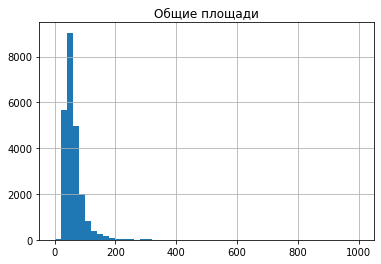

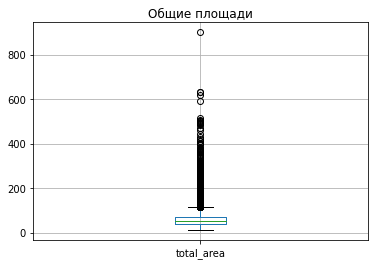

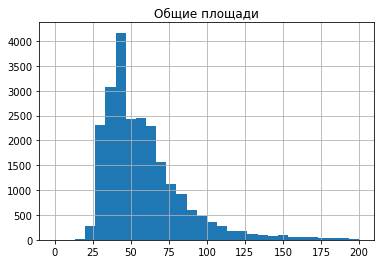

count    23633.000000
mean        60.373484
std         35.673922
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

In [38]:
data['total_area'].hist(bins = 50, range = (0, 1000))
plt.title('Общие площади')
plt.show()
data.boxplot(column='total_area')
plt.title('Общие площади')
plt.show()
data['total_area'].hist(bins = 30, range = (0, 200))
plt.title('Общие площади')
plt.show()
data['total_area'].describe()

Как мы видим среднее значение площади квартиры 60 кв.метров, медианное - 52 кв.метра, самая маленькая квартира имеет площадь всего 12 кв.метров (согласно нормативам, допускается и такое), а самая большая целых 900 кв.метров (судя по всему это уже сегмент ультра-элитной недвижимости). Большая часть квартир имеет площадь от 25 от 110 кв.метров, что выглядит довольно правдоподобно, а большие площади уже редкость.

Изучим данные о жилой площади продаваемых квартир. Для этого построим гистаграмму, диаграмму типа 'ящик с усами', а также выведем числовое описание данных.

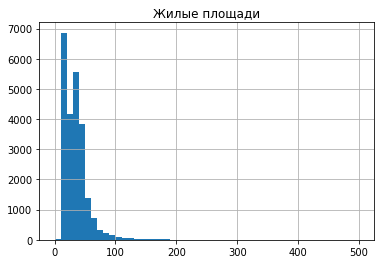

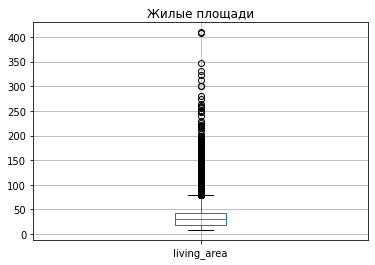

count    23633.000000
mean        34.341444
std         21.701471
min          8.300000
25%         18.400000
50%         30.400000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

In [39]:
data['living_area'].hist(bins = 50, range = (0, 500))
plt.title('Жилые площади')
plt.show()
data.boxplot(column='living_area')
plt.title('Жилые площади')
plt.show()
data['living_area'].describe()

Как мы видим среднее значение жилой площади квартиры 34 кв.метра, медианное - 30 кв.метров, самая маленькая квартира имеет площадь жилых помещений 8 кв.метров, а самая большая целых 409 кв.метров.  Большая часть квартир имеет жилую площадь от 15 до 80 кв.метров, что выглядит довольно правдоподобно, а большие жилые площади уже редкость.

Изучим данные о площади кухонь в продаваемых квартир. Для этого построим гистаграмму, диаграмму типа 'ящик с усами', а также выведем числовое описание данных.

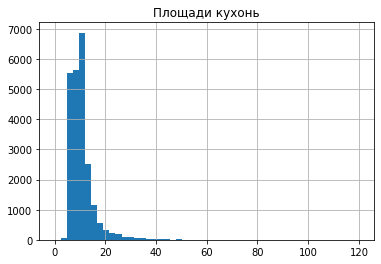

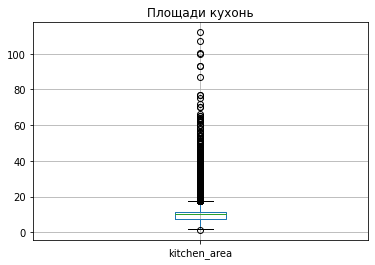

count    23633.000000
mean        10.570262
std          5.613584
min          1.300000
25%          7.400000
50%         10.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

In [40]:
data['kitchen_area'].hist(bins = 50, range = (0, 120))
plt.title('Площади кухонь')
plt.show()
data.boxplot(column='kitchen_area')
plt.title('Площади кухонь')
plt.show()
data['kitchen_area'].describe()

Как мы видим среднее значение площади кухни 10 кв.метров, медианное - 10 кв.метров, самая маленькая квартира имеет площадь кухни 1,3 кв.метра (сделаем допущение, что это может быть студия, в которых иногда нет столь четкого разделения помещений и их площадей), а самая большая целых 112 кв.метров.  Большая часть квартир имеет кухню от 5 до 19 кв.метров, что выглядит довольно правдоподобно, а большие кухни уже редкость.

Изучим данные о цене продаваемых квартир. Для этого построим гистаграммы, диаграмму типа 'ящик с усами', а также выведем числовое описание данных. Для удобства отображения разделим столбец 'last_price' на 1 млн.

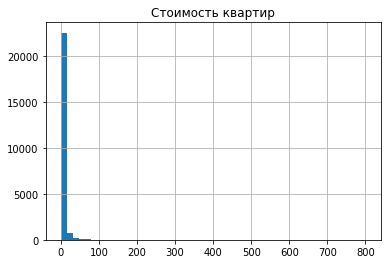

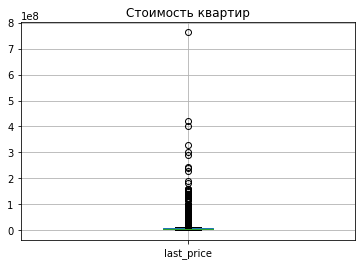

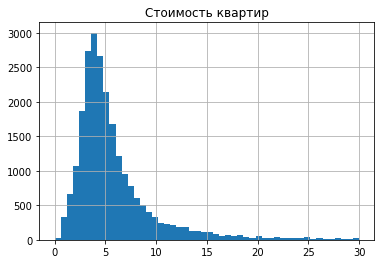

count    23633.000000
mean         6.541210
std         10.869381
min          0.430000
25%          3.420000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

In [41]:
(data['last_price']/1000000).hist(bins = 50, range = (0, 800))
plt.title('Стоимость квартир')
plt.show()
data.boxplot(column='last_price')
plt.title('Стоимость квартир')
plt.show()
(data['last_price']/1000000).hist(bins = 50, range = (0, 30))
plt.title('Стоимость квартир')
plt.show()
(data['last_price']/1000000).describe()

Как мы видим среднее значение цены на квартиру - 6,5 млн., медианное - 4,65 млн., самая маленькая стоимость квартиры 430 тыс. (сделаем допущение, что это может быть студия, в которых иногда нет столь четкого разделения помещений и их площадей), а самая большая стоимость - 763 млн. Большая часть квартир имеет стоимость от 3 млн. до 20 млн., что выглядит довольно правдоподобно, но редкие квартиры продаются и за сотни миллионов.

Изучим данные о количестве комнат в продаваемых квартир. Для этого построим гистаграммы, диаграмму типа 'ящик с усами', а также выведем числовое описание данных.

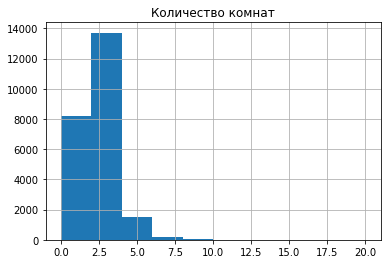

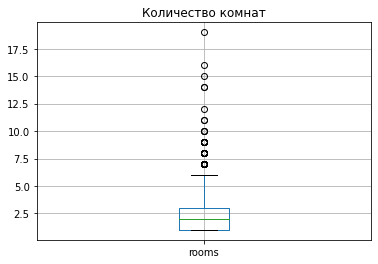

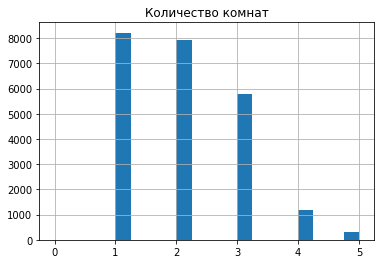

count    23633.000000
mean         2.079423
std          1.066666
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [42]:
data['rooms'].hist(bins = 10, range = (0, 20))
plt.title('Количество комнат')
plt.show()
data.boxplot(column='rooms')
plt.title('Количество комнат')
plt.show()
data['rooms'].hist(bins = 20, range = (0, 5))
plt.title('Количество комнат')
plt.show()
data['rooms'].describe()

Большая часть квартир имеет 1 или 2 комнаты, чуть меньшее количество - 3 комнаты, что выглядит довольно правдоподобно, но редкие квартиры имеют и большее количество комнат, а сама большая квартира имеет целых 19 комнат.

Изучим данные о высоте потолков в продаваемых квартир. Для этого построим гистаграмму, диаграмму типа 'ящик с усами', а также выведем числовое описание данных.

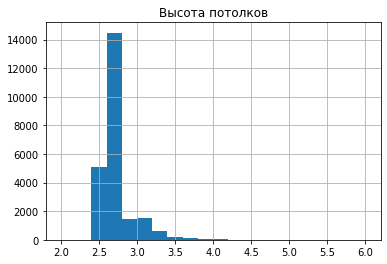

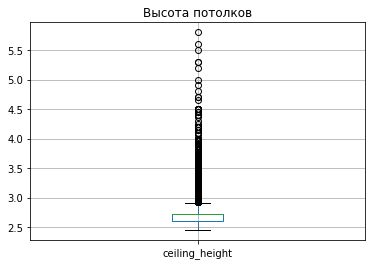

count    23633.000000
mean         2.727211
std          0.216160
min          2.450000
25%          2.600000
50%          2.726276
75%          2.726276
max          5.800000
Name: ceiling_height, dtype: float64

In [43]:
data['ceiling_height'].hist(bins = 20, range = (2, 6))
plt.title('Высота потолков')
plt.show()
data.boxplot(column='ceiling_height')
plt.title('Высота потолков')
plt.show()
data['ceiling_height'].describe()

Как мы видим средняя высота потолков - 2,7 метра, медианная - 2,7 метра, самая маленькая высота потолка 2,45 метра (что соответствует стандартам о минимальной высоте в жилых помещениях), а самая большая высота потолков - 5,8 метра. Большая часть квартир имеет высоту потолков от 2,5м до 3м, что выглядит довольно правдоподобно, а высота больше 4м уже редкость.

Изучим данные об этажах, на которых расположены продаваемые квартиры. Для этого построим гистаграмму, диаграмму типа 'ящик с усами', а также выведем числовое описание данных.

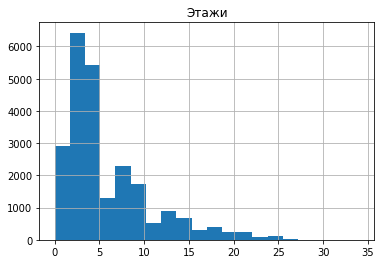

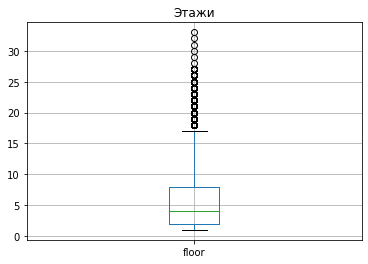

count    23633.000000
mean         5.892862
std          4.883809
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [44]:
data['floor'].hist(bins = 20, range = (0, 34))
plt.title('Этажи')
plt.show()
data.boxplot(column='floor')
plt.title('Этажи')
plt.show()
data['floor'].describe()

Большая часть квартир расположена на этажах с 1 по 17, однако некоторые расположены и на более высоких этажах, а самая высокая квартира расположена на 33 этаже.

Изучим данные о типах этажа, на которых расположены продаваемые квартиры. Для этого построим гистаграмму, а также выведем числовое описание данных.

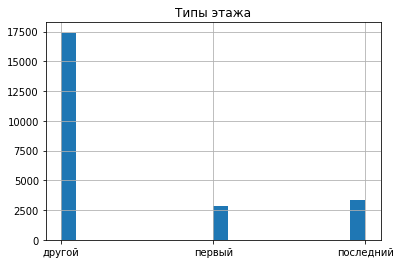

12.182118224516564
14.162400033850972


In [45]:
data['type_floor'].hist(bins = 20)
plt.title('Типы этажа')
plt.show()
print(len(data.loc[data['type_floor'] == 'первый'])/len(data['type_floor'])*100)
print(len(data.loc[data['type_floor'] == 'последний'])/len(data['type_floor'])*100)

Как мы видим чаще всего квартиры располагаются на этажах типа 'другой', доли квартир на первом и последнем этажах примерно равны и составляют 12% и 14% от общего числа квартир.

Изучим данные об общем количестве этажей в домах, на которых расположены продаваемые квартиры. Для этого построим гистаграмму, диаграмму типа 'ящик с усами', а также выведем числовое описание данных.

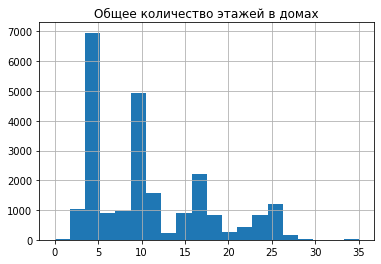

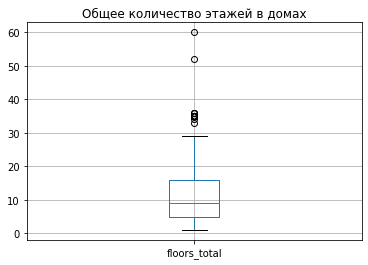

count    23547.000000
mean        10.677921
std          6.596388
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [46]:
data['floors_total'].hist(bins = 20, range = (0, 35))
plt.title('Общее количество этажей в домах')
plt.show()
data.boxplot(column='floors_total')
plt.title('Общее количество этажей в домах')
plt.show()
data['floors_total'].describe()

Большая часть домов имеет от 2 до 28 этажей, однако некоторые дома имеют и большее количество этажей, а самый высокий дом имеет 60 этажей.

Изучим данные о расстоянии до центра города, на котором расположены продаваемые квартиры. Для этого построим гистаграмму, диаграмму типа 'ящик с усами', а также выведем числовое описание данных.

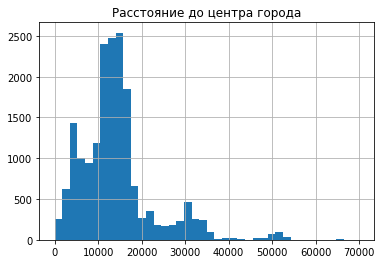

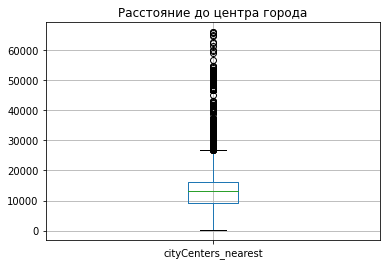

count    18139.000000
mean     14191.284139
std       8611.457999
min        181.000000
25%       9238.000000
50%      13101.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [47]:
data['cityCenters_nearest'].hist(bins = 40, range = (0, 70000))
plt.title('Расстояние до центра города')
plt.show()
data.boxplot(column='cityCenters_nearest')
plt.title('Расстояние до центра города')
plt.show()
data['cityCenters_nearest'].describe()

Как мы видим в среднем квартиры расположены в 14 км от центра города метра, медианное значение расстояния до центра  - 13 км, самая близкая к центру квартира находится в 181 метре (центральнее сложно придумать), а самая далекая от центра на расстоянии целых 65 км. Большая часть квартир расположена на расстоянии от нескольких сотен метров до 26 км до центра, что выглядит довольно правдоподобно (учитывая, что во многих других городах плотность постройки снижается ближе к периферии).

Изучим данные о расстоянии до ближайшего аэропорта, на котором расположены продаваемые квартиры. Для этого построим гистаграмму, диаграмму типа 'ящик с усами', а также выведем числовое описание данных.

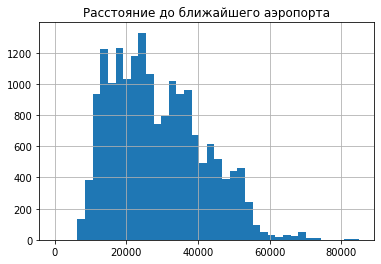

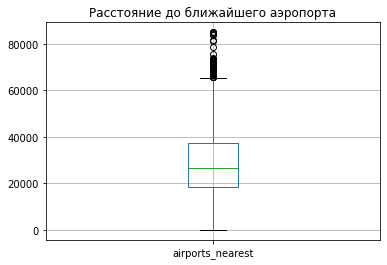

count    18116.000000
mean     28803.194855
std      12636.427265
min          0.000000
25%      18585.000000
50%      26729.000000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [48]:
data['airports_nearest'].hist(bins = 40, range = (0, 85000))
plt.title('Расстояние до ближайшего аэропорта')
plt.show()
data.boxplot(column='airports_nearest')
plt.title('Расстояние до ближайшего аэропорта')
plt.show()
data['airports_nearest'].describe()

Как мы видим в среднем квартиры расположены в 28 км от аэропорта, медианное значение расстояния до центра  - 26 км, самая близкая квартира находится вплотную к аэропорту (скорее всего это связано с неправильно заполненным значением в определенной строке, но возможны и другие варианты), а самая далекая от аэропорта квартира расположена на расстоянии 84 км. Большая часть квартир расположена на расстоянии от 19 км до 64 км до аэропорта, что выглядит довольно правдоподобно (согласно открытым источникам расстояние от центра Санкт-Петербурга до наиболее популярного аэропорта Пулково составляет около 21 км).

Изучим данные о расстоянии до ближайшего парка, на котором расположены продаваемые квартиры. Для этого построим гистаграмму, диаграмму типа 'ящик с усами', а также выведем числовое описание данных.

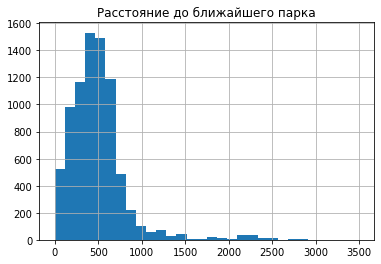

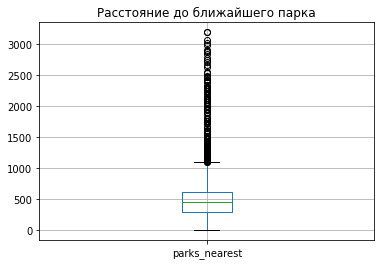

count    8051.000000
mean      490.720780
std       342.729164
min         1.000000
25%       287.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [49]:
data['parks_nearest'].hist(bins = 30, range = (0, 3500))
plt.title('Расстояние до ближайшего парка')
plt.show()
data.boxplot(column='parks_nearest')
plt.title('Расстояние до ближайшего парка')
plt.show()
data['parks_nearest'].describe()

Как мы видим в среднем квартиры расположены в 490 метрах от ближайшего парка, медианное значение расстояния до ближайшего парка  - 454 метра, самая близкая квартира находится на расстоянии всего 1 м к ближайшему парку, а самая далекая расположена на расстоянии 3190 м. Большая часть квартир расположена на расстоянии от нескольких десятков метров до 1 с небольшим километра от ближайшего парка, что выглядит довольно правдоподобно.

Изучим данные о днях недели, в которые были размещены объявления о продаже квартир. Для этого построим гистаграмму, а также выведем числовое описание данных. Напомним, что понедельнику соответствует 0, вторнику - 1 и т.д. на данной гистограмме.

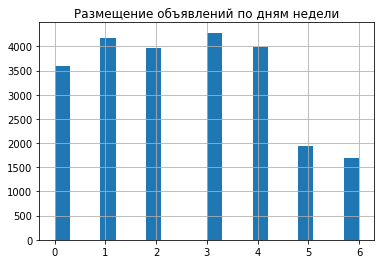

count    23633.000000
mean         2.569881
std          1.788670
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_week_exposition, dtype: float64

In [50]:
data['day_of_week_exposition'].hist(bins = 20, range = (0, 6))
plt.title('Размещение объявлений по дням недели')
plt.show()
data['day_of_week_exposition'].describe()

Как мы видим объявления довольно равномерно размещались с понедельника по пт (чаще всего - по четвергам и вторникам), в выходные наблюдался заметный спад и меньше всего объявлений размещалось по воскресеньям.

Изучим данные о месяцах, в которые были размещены объявления о продаже квартир. Для этого построим гистаграмму, а также выведем числовое описание данных.

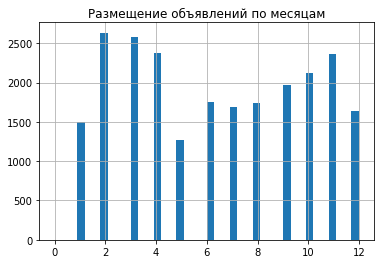

count    23633.000000
mean         6.399103
std          3.491428
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

In [51]:
data['month_exposition'].hist(bins = 40, range = (0, 12))
plt.title('Размещение объявлений по месяцам')
plt.show()
data['month_exposition'].describe()

Как мы видим объявления чаще всего размещались в феврале, марте и апреле, а в мае, январе и декабре наблюдался заметный спад и размещалось меньше всего объявлений (что выглядит весьма правдаподобно, т.к. в эти месяцы довольно много праздничных и выходных дней).

Изучим данные о том, как быстро продавались квартиры. Для этого построим гистаграмму, диаграмму типа 'ящик с усами', а также выведем числовое описание данных.

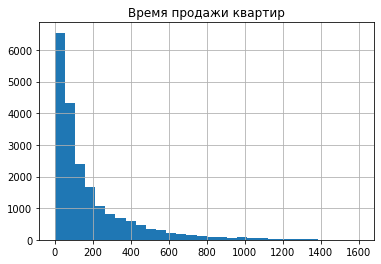

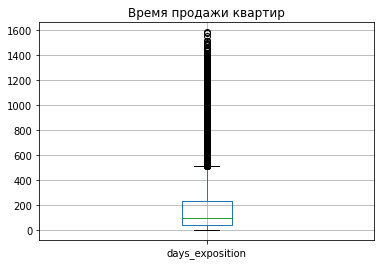

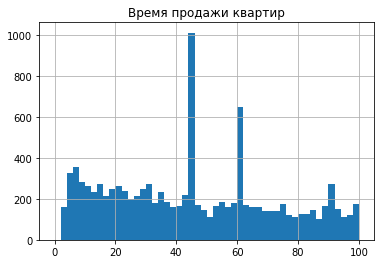

count    20460.000000
mean       181.037879
std        219.921779
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [52]:
data['days_exposition'].hist(bins = 30, range = (0, 1600))
plt.title('Время продажи квартир')
plt.show()
data.boxplot(column='days_exposition')
plt.title('Время продажи квартир')
plt.show()
data['days_exposition'].hist(bins = 50, range = (0, 100))
plt.title('Время продажи квартир')
plt.show()
data['days_exposition'].describe()

Как мы видим средний показатель продажи квартиры - 181 день, медианное значение - 95 дней, самая быстрая продажа была за 1 день, а самая долгая целых 1580 дней. При этом многие были проданы даже менее чем за 50 дней, что можно считать быстрыми продажами, однако встречались и необычно долгие продажи, продолжительность которых составляла более 500 дней.

Изучим какие факторы больше всего влияют на стоимость квартиры. Для этого построим графики зависимости стоимости квартиры от различных параметров.

Построим график зависимости стоимости квартиры от общей площади. По оси х отложим стоимость, а по оси у - общую площадь.\
А также посчитаем коэффициент корреляции Пирсона между этими показателями.

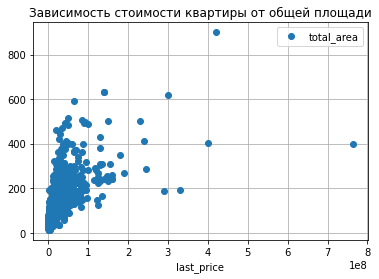

0.65


In [53]:
data.plot(x='last_price', y='total_area', style='o', grid = True)
plt.title('Зависимость стоимости квартиры от общей площади')
plt.show()
print((data['last_price'].corr(data['total_area'])).round(2))

Как мы видим эти параметры ощутимо зависят друг от друга и с увеличением площади возрастает стоимость, что вполне логично. Это же мы видим если судить по коэффициенту корреляции Пирсона, который показывает зависомость близкую к высокой.

Построим график зависимости стоимости квартиры от жилой площади. По оси х отложим стоимость, а по оси у - жилую площадь.\
А также посчитаем коэффициент корреляции Пирсона между этими показателями.

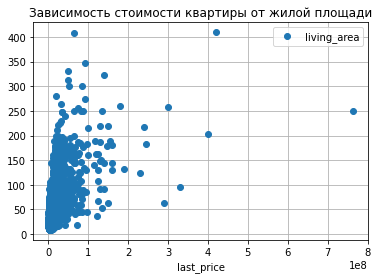

0.56


In [54]:
data.plot(x='last_price', y='living_area', style='o', grid = True)
plt.title('Зависимость стоимости квартиры от жилой площади')
plt.show()
print((data['last_price'].corr(data['living_area'])).round(2))

Как мы видим эти параметры также зависят друг от друга (хотя зависимость меньше, чем от общей площади). С увеличением жилой площади возрастает стоимость, что  также вполне логично. При этом коэффициент корреляции Пирсона показывает среднюю зависомость.

Построим график зависимости стоимости квартиры от площади кухни. По оси х отложим стоимость, а по оси у - площадь кухни.\
А также посчитаем коэффициент корреляции Пирсона между этими показателями.

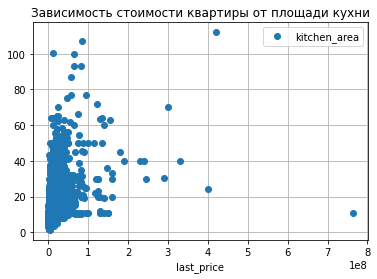

0.44


In [55]:
data.plot(x='last_price', y='kitchen_area', style='o', grid = True)
plt.title('Зависимость стоимости квартиры от площади кухни')
plt.show()
print((data['last_price'].corr(data['kitchen_area'])).round(2))

Как мы видим зависимость стоимости квартиры от площади кухни еще меньше, чем от жилой площади. Коэффициент корреляции Пирсона показывает зависомость уже ниже средней.

Построим график зависимости стоимости квартиры от количества комнат в ней. По оси х отложим стоимость, а по оси у - количество комнат.\
А также посчитаем коэффициент корреляции Пирсона между этими показателями.

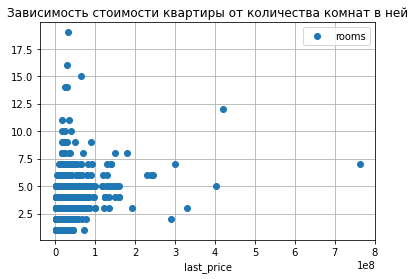

0.37


In [56]:
data.plot(x='last_price', y='rooms', style='o', grid = True)
plt.title('Зависимость стоимости квартиры от количества комнат в ней')
plt.show()
print((data['last_price'].corr(data['rooms'])).round(2))

Как мы видим зависимость стоимости квартиры от количества комнат еще меньше, чем от каждой из площадей. Если судить по коэффициенту корреляции Пирсона зависомость уже близка к очень слабой.

Построим график зависимости стоимости квартиры от типа этажа на котором она расположена (первый, последний, другой). По оси х отложим стоимость, а по оси у - тип этажа.

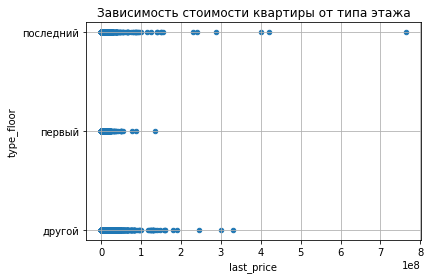

In [57]:
data.plot(x='last_price', y='type_floor', kind='scatter', grid = True)
plt.title('Зависимость стоимости квартиры от типа этажа')
plt.show()

Как мы видим зависимость стоимости квартиры от типа этажа на котором она расположена отсутствует или практически отсутствует.

Построим графики зависимости стоимости квартиры от даты размещения объявления о продаже(день недели, месяц, год). По оси х отложим стоимость, а по оси у - даты.
А также посчитаем коэффициент корреляции Пирсона между этими показателями.

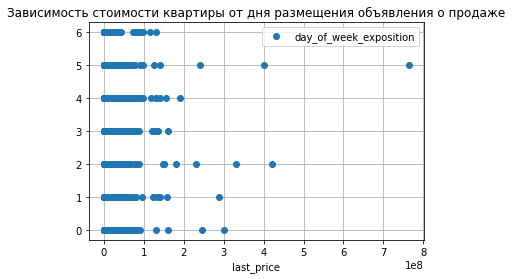

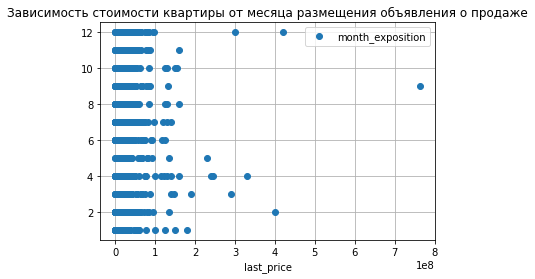

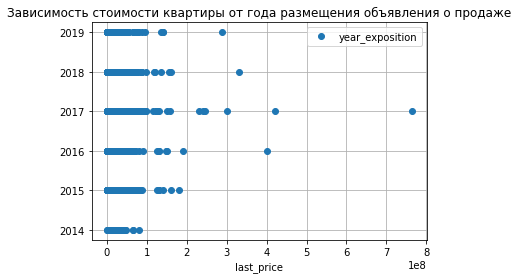

In [58]:
data.plot(x='last_price', y='day_of_week_exposition', style='o', grid = True)
plt.title('Зависимость стоимости квартиры от дня размещения объявления о продаже')
plt.show()
data.plot(x='last_price', y='month_exposition', style='o', grid = True)
plt.title('Зависимость стоимости квартиры от месяца размещения объявления о продаже')
plt.show()
data.plot(x='last_price', y='year_exposition', style='o', grid = True)
plt.title('Зависимость стоимости квартиры от года размещения объявления о продаже')
plt.show()

Как мы видим зависимость стоимости квартиры от даты размещения объявления о продаже (как от дня недели, так и от месяца и года) отсутствует.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Для удобства построим свобную таблицу и округлим полученную стоимость.

In [59]:
top_10_locality = data.pivot_table(index = 'locality_name', values = 'price_area', aggfunc = ['count','mean'])
top_10_locality.columns = ('Количество предложений', 'Средняя цена квадратного метра')
display(top_10_locality.sort_values(by='Количество предложений', ascending = False).head(10).round(0))

,Количество предложений,Средняя цена квадратного метра
locality_name,,
Санкт-Петербург,15687,114782.0
Мурино,589,86062.0
Кудрово,471,95326.0
Шушары,440,78677.0
Всеволожск,397,68719.0
Пушкин,366,103148.0
Колпино,337,75444.0
Парголово,327,90176.0
Гатчина,307,68746.0


Как мы видим больше всего предложений в Санкт-Петербурге и там же самые высокие цены за один квадратный метр, а самая низкая средняя цена в Выборге - практически в 2 раза меньше чем в Санкт-Петербурге.

Теперь посмотрим как меняется стоимость квартир непосредственно в самом Санкт-Петербурге в зависимости от расстояния до центра города. Для удобства построим сводную таблицу и отобразим данные о средней стоимости квартир для первых 15 км от центра города, а также для наглядности построим график со средней стоимостью квартир для 24 км от центра города (примерное расстояние от центра города до его административной границы)

In [60]:
price_for_km = data.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'mean')
price_for_km.columns = ['Средняя стоимость квартиры']
display(price_for_km.round(0).head(16))

,Средняя стоимость квартиры
cityCenters_nearest_km,
0.0,31449116.0
1.0,21158707.0
2.0,17808293.0
3.0,11102708.0
4.0,13277474.0
5.0,14472364.0
6.0,15089533.0
7.0,14795260.0
8.0,9935407.0


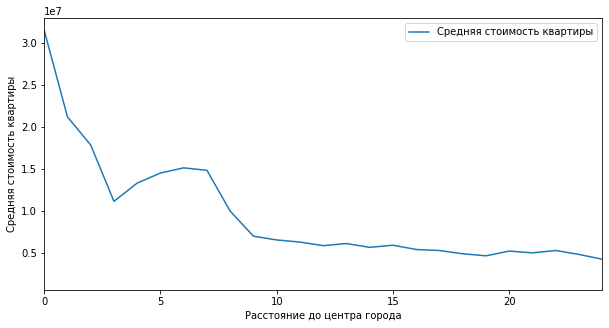

In [61]:
price_for_km.plot(xlim=(0,24), xlabel = 'Расстояние до центра города', ylabel = 'Средняя стоимость квартиры', figsize = (10,5))
plt.show()

Как мы видим наибольшая средняя стоимость квартир наблюдается для первых 7 км от центра города, далее идет заметный спад и начиная с 9 км с каждым последующим километром наблюдается плавное снижение стоимости. Например, разница между средней стоимостью квартиры расположенной в 7 км от центра и в 10 км более чем 2 раза.

<b>Вывод:</b>  самые дорогие квартиры по стоимости квадратного метра расположены в Санкт-Петербурге, а самые дешевые - в Выборге, а в самом Санкт-Петербурге самые дорогие квартиры расположены в радиусе 7 км от центра города.

### Общий вывод


- большинство квартир имеют общую площадь от 25 до 110 кв.метров, жилую площадь от 15 до 80 кв.метров, площадь кухни от 5 до 19 кв.метров;
- стоимость большинство квартир - от 3 до 20 млн.;
- большинство квартир однокомнатные или двухкомнатные, чуть реже трехкомнатные, однако встречаются квартиры и с большим количеством комнат;
- большинство квартир имеет высоту потолков от 2,5 до 3 метров;
- большинство квартир находится на этажах с 1 по 17, из которых 12% находятся на первом этаже, а 14% - на последнем этаже, при этом большинство домов имеют от 2 до 28 этажей;
- большинство квартир располагается в радиусе 26 км от центра города, на расстоянии от 19 до 64 км от ближайшего аэропорта и всего в нескольких сотнях метров и до 1 км от ближайшего парка;
- объявления о продаже равномерно размещались в течение рабочей недели (с пн по пт) и реже в выходные чаще, всего в феврале, марте и апреле и реже всего в мае, январе и декабре; 
- наиболее быстрыми продажами можно считать сделки проведенные меньше чем за 50 дней, а долгими - уже более 500 дней;
- больше всего на стоимость квартиры влияет общая площадь, меньше - жилая площадь и площадь кухни, влияние количества комнат и этаж очень малы, а дата размещения объявления о продаже вообще не влияет на стоимость продажи;
- самая высокая цена за 1 кв. метр в Санкт-Петербурге, а самая низкая из топ-10 по количеству предложений - в Выборге;
- в самом Санкт-Петербурге самая высокая стоимость квартир в радиусе 7 км от центра города.